In [1]:
import datetime
import re
import pymongo
import pandas as pd
from pandas import DataFrame
import talib
from datetime import datetime

# from QUANTAXIS.QAFetch.QAQuery import *
# from QUANTAXIS.QAFetch.QAQuery_Advance import *

import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as ticker
plt.style.use('seaborn-notebook')

In [8]:
AllAStock =pd.read_pickle('G:/WIFA Quant Data/股票与日期数据/AllAStock.pkl')
TDayArray  = pd.read_pickle('G:/WIFA Quant Data/股票与日期数据/TDayArray.pkl')

s_dq_close=pd.read_pickle('G:/WIFA Quant Data/量价数据/s_dq_adjclose.pkl')
s_dq_close_df = pd.DataFrame(s_dq_close.T,index =TDayArray,columns= AllAStock)
s_dq_close_df.index = pd.to_datetime(s_dq_close_df.index)

s_dq_close_df_m = s_dq_close_df.resample('m').last()
ret_df_m = s_dq_close_df_m / s_dq_close_df_m.shift(1) - 1

In [3]:
codelist = ['BINANCE.BCHUSDT', 'BINANCE.BTCUSDT', 'BINANCE.ETHUSDT', 'BINANCE.ETCUSDT', 'BINANCE.LTCUSDT', 'BINANCE.XLMUSDT', 'BINANCE.XRPUSDT', 'BINANCE.ZECUSDT']

In [4]:
codelist = ['BINANCE.ETHUSDT']

In [71]:
data2 = QA_fetch_cryptocurrency_day_adv(
        code=codelist,
        start='2020-01-01',
        end='2021-06-14'
    )

In [76]:
close = data2.data.reset_index().set_index('date',drop=True)

In [42]:
close = s_dq_close_df[['600519.SH']]
close.columns = ['close']
close = close.loc['2010':]

## 1.技术指标库测试及样例

In [14]:
from TechIndicator.BasicIndicator import *

In [5]:
import DPO as module_to_check
print(
    'checking module "{}"'
    .format(module_to_check.__name__))

for attr in dir(module_to_check):
    if callable(getattr(module_to_check, attr)):
        print(
            'function "{}" came from module "{}"'
            .format(
                getattr(module_to_check, attr).__name__,
                getattr(module_to_check, attr).__module__))

checking module "DPO"
function "ABS" came from module "DPO.DataProcess.TechIndicator.BasicIndicator"
function "BBI" came from module "DPO.DataProcess.TechIndicator.BasicIndicator"
function "BOLL" came from module "DPO.DataProcess.TechIndicator.BasicIndicator"
function "COUNT" came from module "DPO.DataProcess.TechIndicator.BasicIndicator"
function "DIFF" came from module "DPO.DataProcess.TechIndicator.BasicIndicator"
function "DPODenoising" came from module "DPO.DataProcess.DataDenosing.Denoising"
function "DPO_gettatech" came from module "DPO.DataProcess.TechIndicator.TAIndicator"
function "DPO_hpfilter" came from module "DPO.DataProcess.DataDenosing.Denoising"
function "DPO_kalmanfilter" came from module "DPO.DataProcess.DataDenosing.Denoising"
function "DPO_wavelet" came from module "DPO.DataProcess.DataDenosing.Denoising"
function "EMA" came from module "DPO.DataProcess.TechIndicator.BasicIndicator"
function "HHV" came from module "DPO.DataProcess.TechIndicator.BasicIndicator"
func

In [15]:
import TechIndicator.BasicIndicator as module_to_check
print(
    'checking module "{}"'
    .format(module_to_check.__name__))

for attr in dir(module_to_check):
    if callable(getattr(module_to_check, attr)):
        print(
            'function "{}" came from module "{}"'
            .format(
                getattr(module_to_check, attr).__name__,
                getattr(module_to_check, attr).__module__))

checking module "TechIndicator.BasicIndicator"
function "ABS" came from module "TechIndicator.BasicIndicator"
function "BBI" came from module "TechIndicator.BasicIndicator"
function "BOLL" came from module "TechIndicator.BasicIndicator"
function "COUNT" came from module "TechIndicator.BasicIndicator"
function "DIFF" came from module "TechIndicator.BasicIndicator"
function "EMA" came from module "TechIndicator.BasicIndicator"
function "HHV" came from module "TechIndicator.BasicIndicator"
function "IF" came from module "TechIndicator.BasicIndicator"
function "IFAND" came from module "TechIndicator.BasicIndicator"
function "IFOR" came from module "TechIndicator.BasicIndicator"
function "KDJ" came from module "TechIndicator.BasicIndicator"
function "LLV" came from module "TechIndicator.BasicIndicator"
function "MA" came from module "TechIndicator.BasicIndicator"
function "MACD" came from module "TechIndicator.BasicIndicator"
function "MAX" came from module "TechIndicator.BasicIndicator"
fu

In [29]:
macd = MACD(close.loc['2019':])

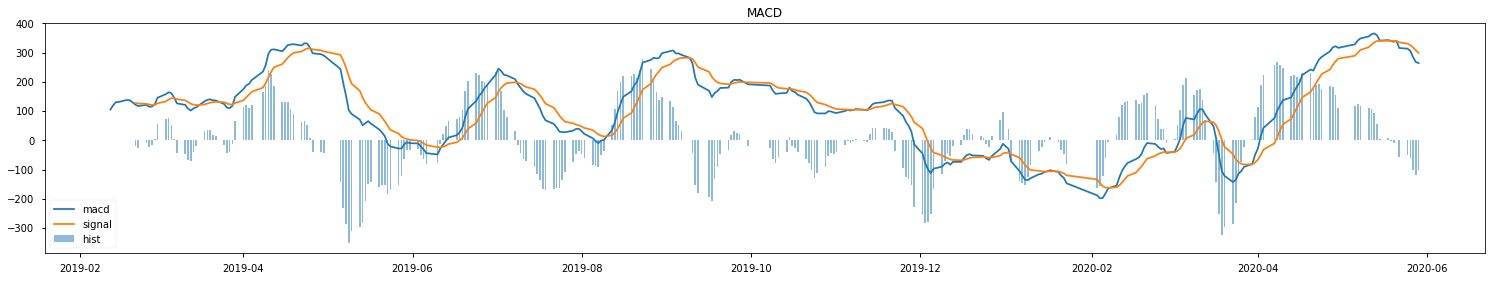

In [32]:
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_macd = fig.add_axes((0, 0.48, 1, 0.2))
    
ax_macd.plot(macd.index, macd["DIF"], label="macd")
ax_macd.bar(macd.index, macd["MACD"] * 1.5, label="hist",width=0.6,alpha=0.5)
ax_macd.plot(macd.index, macd["DEA"], label="signal")
ax_macd.set_title('MACD')
ax_macd.legend()

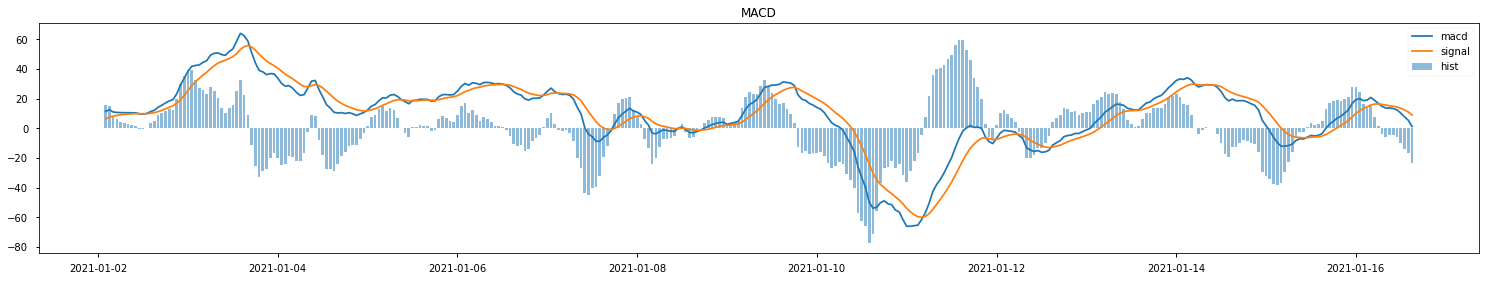

In [26]:
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_macd = fig.add_axes((0, 0.48, 1, 0.2))
    
ax_macd.plot(macd.index, macd["DIF"], label="macd")
ax_macd.bar(macd.index, macd["MACD"] * 1.5, label="hist",width=0.03,alpha=0.5)
ax_macd.plot(macd.index, macd["DEA"], label="signal")
ax_macd.set_title('MACD')
ax_macd.legend()

In [221]:
def plot_chart(data, title):
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32)) 
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle) 
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    
    data['datenum'] = data.reset_index().date.apply(lambda x:mpl.dates.date2num(x)).values
    
    ax_candle.plot(data.date, MA(data.close,7), label="MA7")
    ax_candle.plot(data.date, MA(data.close,8), label="MA8")
    ax_candle.plot(data.date, MA(data.close,25), label="MA25")
    candlestick_ohlc(ax_candle, data[['datenum','open','high','low','close']].values, colorup="g", colordown="r", width=0.8)
 
    ax_candle.grid(True)
    ax_candle.set_title(title, fontsize=20)
    ax_candle.legend()
 
    macd = MACD(data)
    ax_macd.plot(data.date, macd["DIF"], label="macd")
    ax_macd.bar(data.date, macd["MACD"] * 1.5, label="hist",width=0.5,alpha=0.5)
    ax_macd.plot(data.date, macd["DEA"], label="signal")
    ax_macd.set_title('MACD')
    ax_macd.legend()
 
    rsi = RSI(data)
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.date, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.date, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.date, rsi['RSI1'], label="rsi")
    ax_rsi.set_title('RSI')
    ax_rsi.legend()
 
    ax_vol.bar(data.date, data["volume"] / 1000000)
    ax_vol.set_ylabel("(Million)")



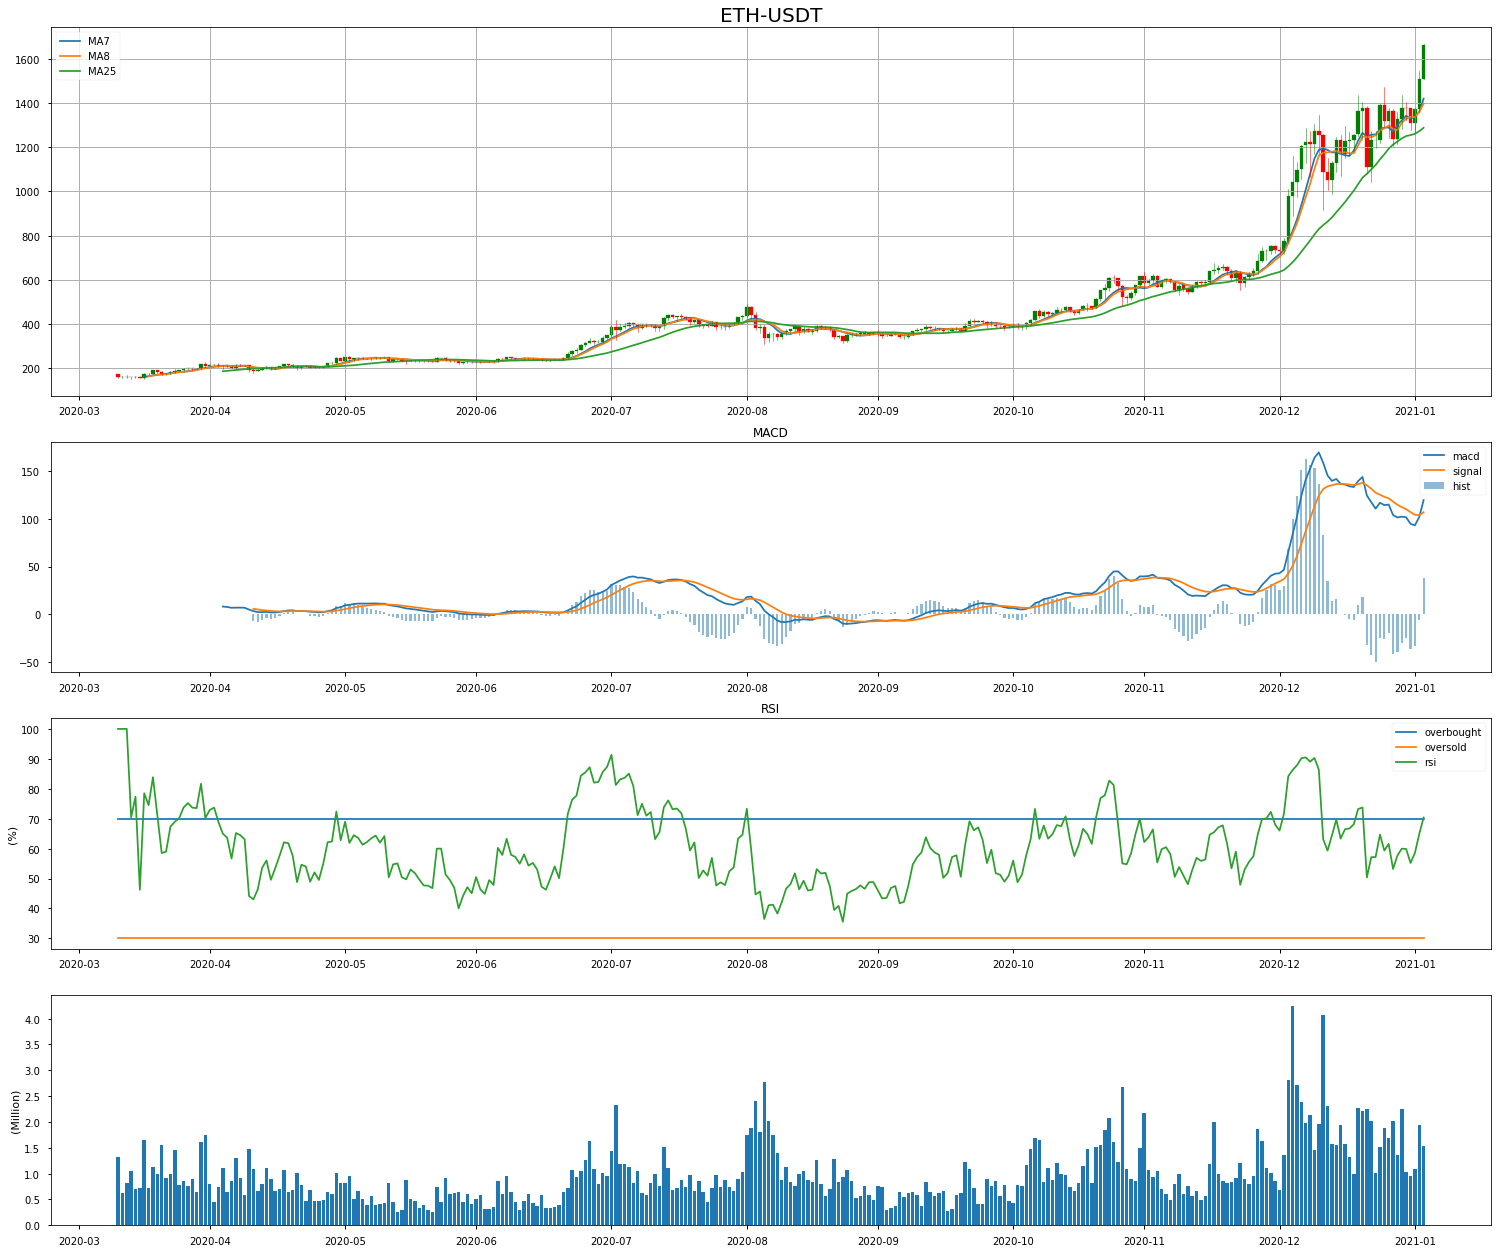

In [119]:
plot_chart(close.reset_index().iloc[100:400], 'ETH-USDT')

In [17]:
%timeit macd = MACD(close)

4.37 ms ± 856 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit talib.MACD(close.close.values)

93.7 µs ± 7.54 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### 后续改进1.考虑用numpy+numba加速

## 数据降噪分解

### H-P 滤波

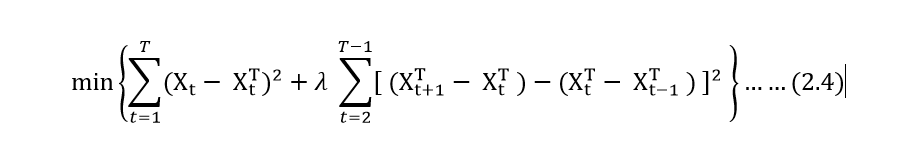

In [87]:
import statsmodels.api as sm

In [200]:
X = close.loc['2019':].close
X.shape

(341,)

In [201]:
%%time
c,t = sm.tsa.filters.hpfilter(X, lamb=1)

Wall time: 4.01 ms


In [202]:
X = close.loc['2015':].close
X.shape

(1316,)

In [205]:
%%time
c,t = sm.tsa.filters.hpfilter(X, lamb=1)

Wall time: 7.98 ms


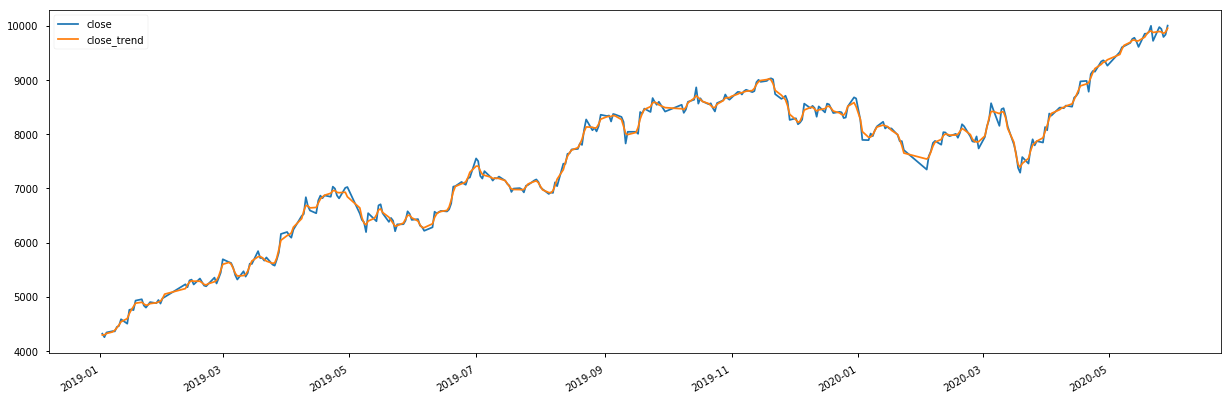

In [90]:
pd.concat([close.loc['2019':].close,t],axis=1).plot(figsize=(21,7))

In [159]:
??sm.tsa.filters.hpfilter

### Kalman滤波

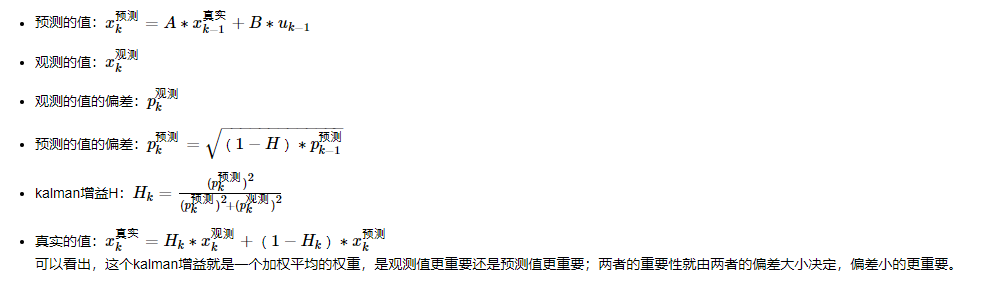

In [21]:
from pykalman import KalmanFilter

def Kalman1D(observations,damping=1):
    observation_covariance = damping # 观察偏差，越大越偏离真实值
    initial_value_guess = observations[0]
    transition_matrix = 1 # 预测时真实值的系数x_t-1
    transition_covariance = 0.5 # 初始预测偏差 H，越大越接近真实值
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state

In [148]:
temp_close = close.loc['2019':].copy()

In [27]:
raw_data.ClosePx[100: 400].values.shape

(300,)

In [35]:
Kalman1D(raw_data.ClosePx[100: 400].values).reshape(-1).shape

(300,)

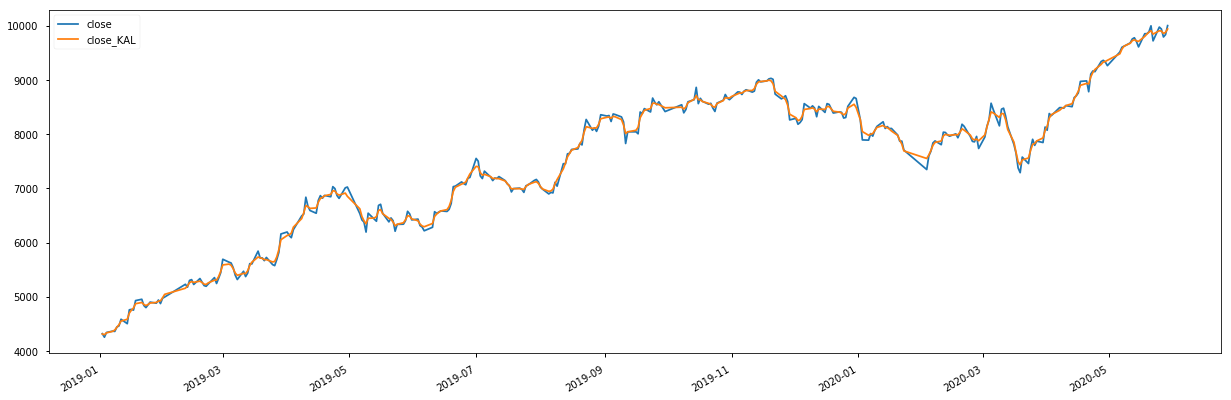

In [283]:
pd.concat([temp_close.close,pd.DataFrame(Kalman1D(temp_close.close,0.5),columns=['close_KAL'],index=temp_close.index)],axis=1).plot(figsize=(21,7))

In [207]:
X = close.loc['2019':].close
X.shape

(341,)

In [214]:
%%time
x = Kalman1D(X)

Wall time: 214 ms


In [152]:
??KalmanFilter

### 小波分解

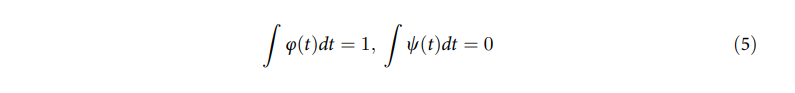

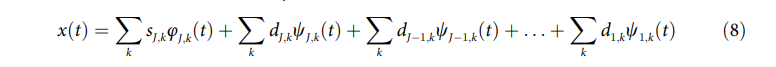

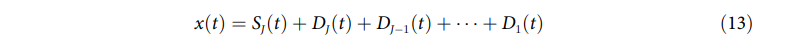

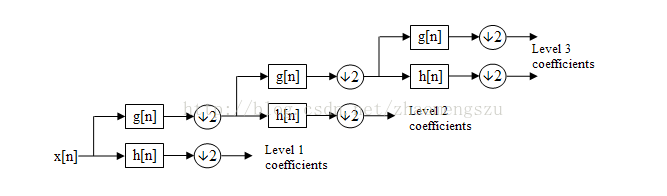

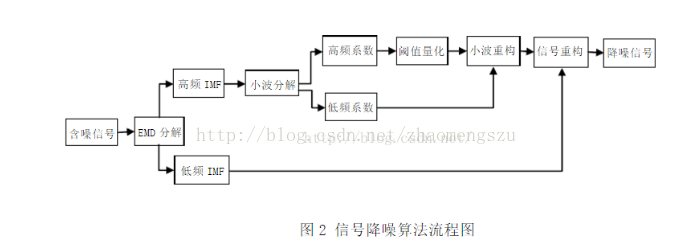

In [41]:
import pywt
for family in pywt.families():
     print("%s family: " % family + ', '.join(pywt.wavelist(family)))

haar family: haar
db family: db1, db2, db3, db4, db5, db6, db7, db8, db9, db10, db11, db12, db13, db14, db15, db16, db17, db18, db19, db20, db21, db22, db23, db24, db25, db26, db27, db28, db29, db30, db31, db32, db33, db34, db35, db36, db37, db38
sym family: sym2, sym3, sym4, sym5, sym6, sym7, sym8, sym9, sym10, sym11, sym12, sym13, sym14, sym15, sym16, sym17, sym18, sym19, sym20
coif family: coif1, coif2, coif3, coif4, coif5, coif6, coif7, coif8, coif9, coif10, coif11, coif12, coif13, coif14, coif15, coif16, coif17
bior family: bior1.1, bior1.3, bior1.5, bior2.2, bior2.4, bior2.6, bior2.8, bior3.1, bior3.3, bior3.5, bior3.7, bior3.9, bior4.4, bior5.5, bior6.8
rbio family: rbio1.1, rbio1.3, rbio1.5, rbio2.2, rbio2.4, rbio2.6, rbio2.8, rbio3.1, rbio3.3, rbio3.5, rbio3.7, rbio3.9, rbio4.4, rbio5.5, rbio6.8
dmey family: dmey
gaus family: gaus1, gaus2, gaus3, gaus4, gaus5, gaus6, gaus7, gaus8
mexh family: mexh
morl family: morl
cgau family: cgau1, cgau2, cgau3, cgau4, cgau5, cgau6, cgau7, 

In [217]:
def wrcoef(X, coef_type, coeffs, wavename, level):
    N = np.array(X).size
    a, ds = coeffs[0], list(reversed(coeffs[1:]))
    if coef_type =='a':
        return pywt.upcoef('a', a, wavename, level=level)[:N]
    elif coef_type == 'd':
        return pywt.upcoef('d', ds[level-1], wavename, level=level)[:N]
    else:
        raise ValueError("Invalid coefficient type: {}".format(coef_type))

In [331]:
X = close.loc['2019':].close

In [332]:
%%time
coeffs = pywt.wavedec(X.values, 'haar', level=2)
A2 = wrcoef(X.values, 'a', coeffs, 'haar', 2)
D2 = wrcoef(X.values, 'd', coeffs, 'haar', 2)
D1 = wrcoef(X.values, 'd', coeffs, 'haar', 1)

Wall time: 0 ns


In [351]:
# 重构阈值
threshold_num = 0.5 * D2.std()

In [352]:
D2_less = pywt.threshold(D2, value=threshold_num, mode='less', substitute=threshold_num)
D2_less = pywt.threshold(D2_less, value=-threshold_num, mode='greater', substitute=-threshold_num)

In [353]:
D1_less = pywt.threshold(D1, value=threshold_num, mode='less', substitute=threshold_num)
D1_less = pywt.threshold(D1_less, value=-threshold_num, mode='greater', substitute=-threshold_num)

In [354]:
A2_wt = A2 + D2_less + D1_less

Text(0.5,1,'cD1')

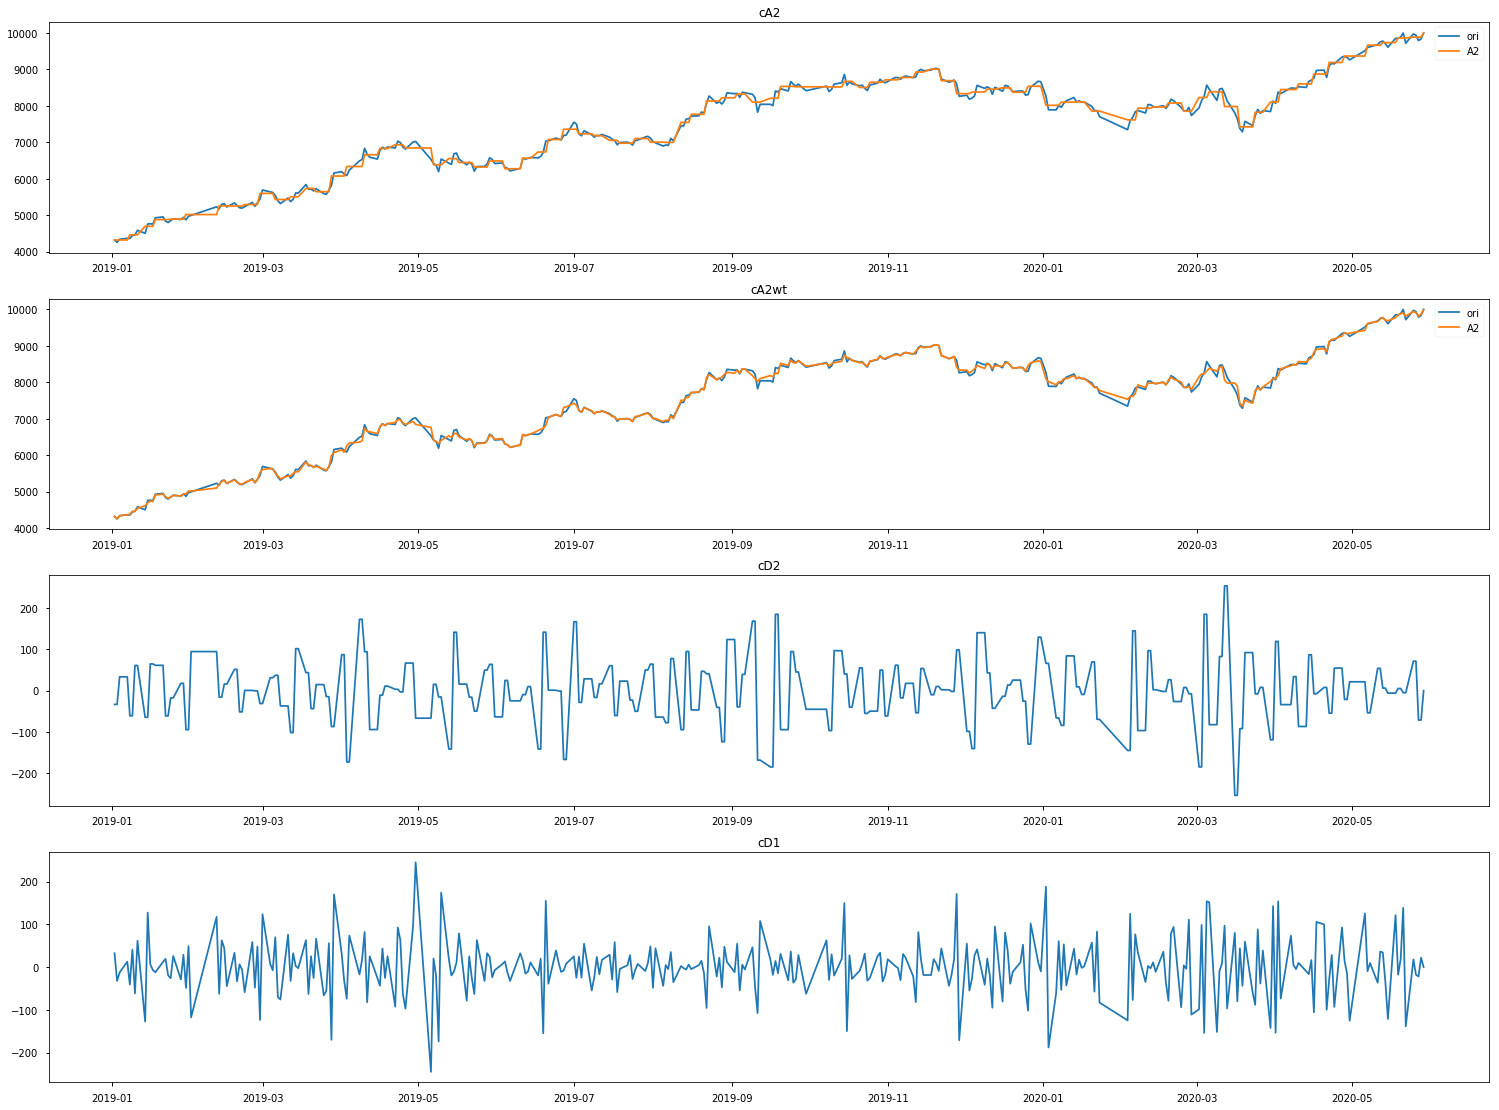

In [355]:
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_A2 = fig.add_axes((0, 0.72, 1, 0.2)) 
ax_A2wt = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_A2)  
ax_D2 = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_A2)  
ax_D1 = fig.add_axes((0, 0, 1, 0.2), sharex=ax_A2)

ax_A2.plot(X.index,X.values,label='ori')
ax_A2.plot(X.index,A2,label='A2')
ax_A2.set_title('cA2')
ax_A2.legend()

ax_A2wt.plot(X.index,X.values,label='ori')
ax_A2wt.plot(X.index,A2_wt,label='A2')
ax_A2wt.set_title('cA2wt')
ax_A2wt.legend()

ax_D2.plot(X.index, D2)
ax_D2.set_title('cD2')

ax_D1.plot(X.index, D1)
ax_D1.set_title('cD1')

In [281]:
%%time
coeffs = pywt.wavedec(X, 'haar', level=1)
A1 = wrcoef(X, 'a', coeffs, 'haar', 1)
D1 = wrcoef(X, 'd', coeffs, 'haar', 1)

Wall time: 998 µs


Text(0.5,1,'cD1')

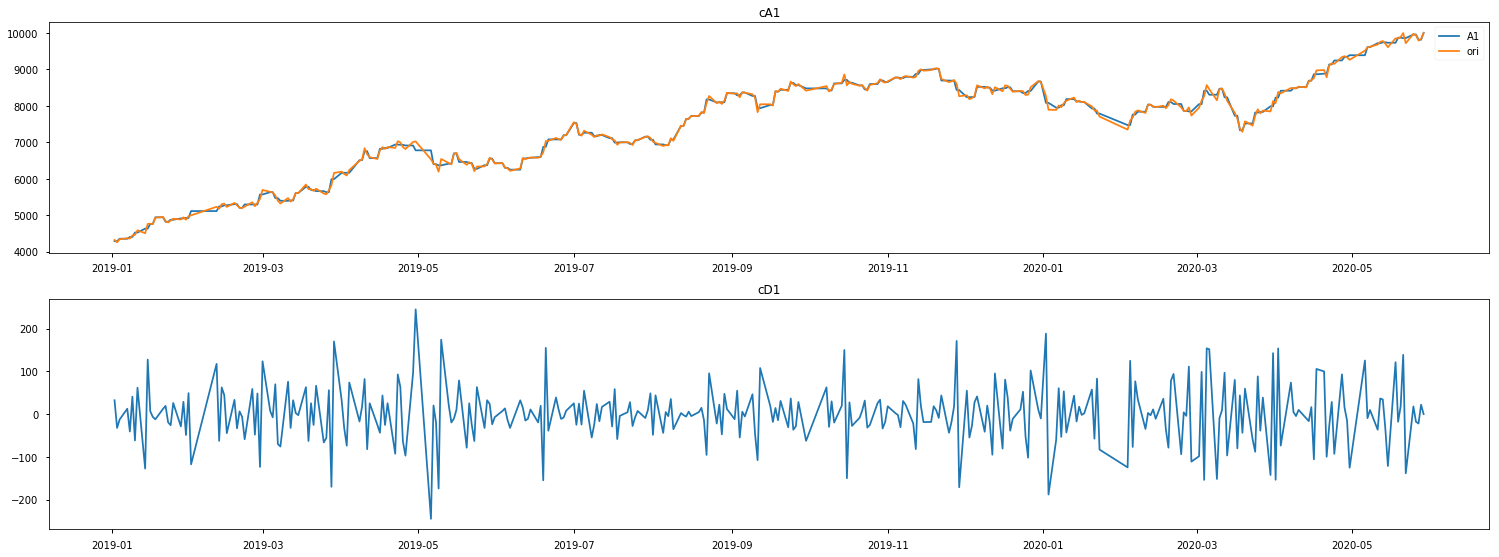

In [309]:
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_A1 = fig.add_axes((0, 0.48, 1, 0.2)) 
ax_D1 = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_A1)  

ax_A1.plot(temp_close.date,A1,label='A1')
ax_A1.plot(temp_close.date,temp_close.close.values,label='ori')
ax_A1.set_title('cA1')
ax_A1.legend()

ax_D1.plot(temp_close.date, D1)
ax_D1.set_title('cD1')

## RAW DATA TESTING

In [2]:
import os

In [2]:
raw_data = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + "\\data\\minutedata_600519.SH.csv")

In [232]:
raw_data = pd.read_csv("./data/row_data.csv",index_col=0)

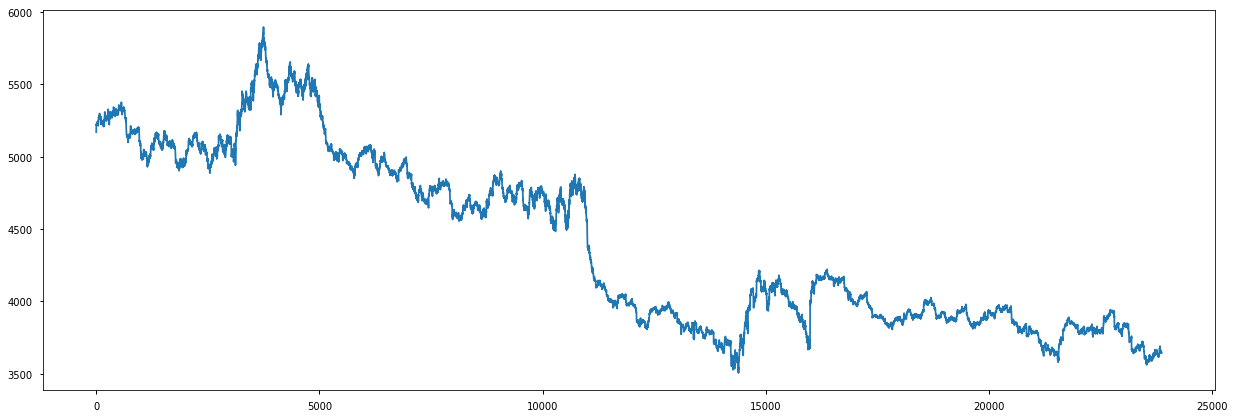

In [236]:
raw_data.y.plot(figsize=(21,7))

In [286]:
def plot_chart(data, title):
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle) 
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
 
    ax_candle.plot(data.index.to_list(), MA(data.close,7), label="MA7")
    ax_candle.plot(data.index.to_list(), MA(data.close,8), label="MA8")
    ax_candle.plot(data.index.to_list(), MA(data.close,25), label="MA25")

    ax_candle.grid(True)
    ax_candle.set_title(title, fontsize=20)
    ax_candle.legend()
 
    macd = MACD(data)
    ax_macd.plot(data.index.to_list(), macd["DIF"], label="macd")
    ax_macd.bar(data.index.to_list(), macd["MACD"] * 1.5, label="hist",width=0.5,alpha=0.5)
    ax_macd.plot(data.index.to_list(), macd["DEA"], label="signal")
    ax_macd.set_title('MACD')
    ax_macd.legend()
 
    rsi = RSI(data)
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index.to_list(), [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index.to_list(), [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index.to_list(), rsi['RSI'], label="rsi")
    ax_rsi.set_title('RSI')
    ax_rsi.legend()
 

In [316]:
temp_data = raw_data[['y']]
temp_data.columns = ['close']

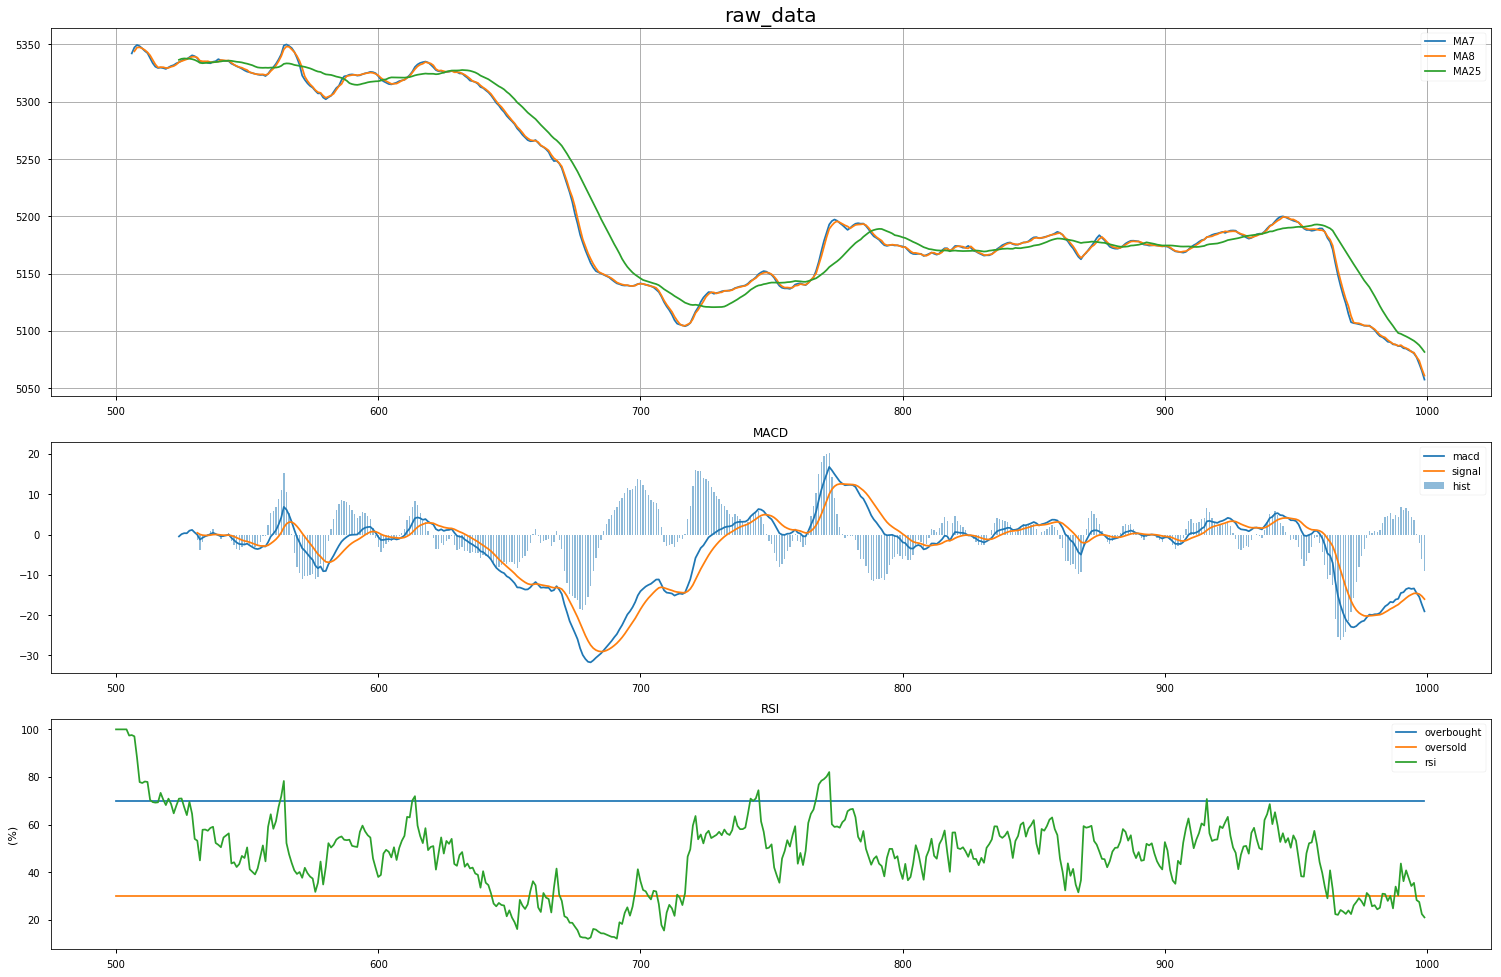

In [254]:
plot_chart(temp_data.iloc[500:1000],'raw_data')

In [13]:
import statsmodels.api as sm
c,t = sm.tsa.filters.hpfilter(raw_data.OpenPx[100:400].values.astype(float), lamb=1)

In [15]:
t.shape

(300,)

In [358]:
X = temp_data.iloc[500:1000].close
X.shape

(500,)

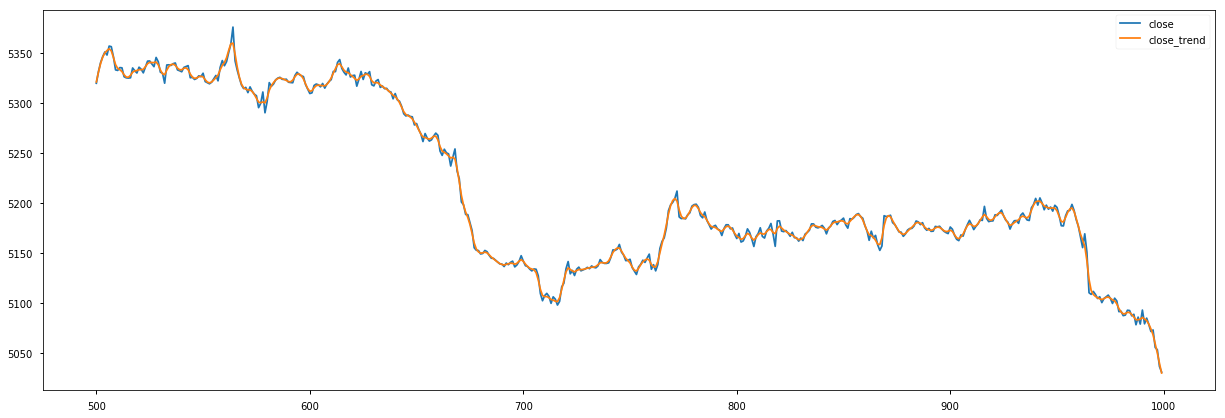

In [256]:
# HP滤波
c,t = sm.tsa.filters.hpfilter(X, lamb=1)
pd.concat([X,t],axis=1).plot(figsize=(21,7))

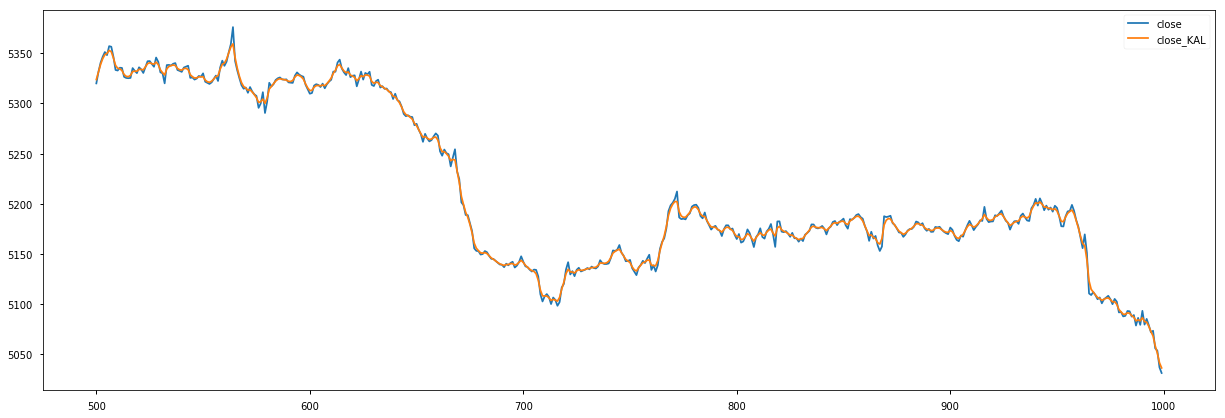

In [259]:
# Kalman滤波
pd.concat([X,pd.DataFrame(Kalman1D(X.values,0.5),columns=['close_KAL'],index=X.index)],axis=1).plot(figsize=(21,7))

In [362]:
def wt_denoising(X,threshold_num=0.5,plot=False):
    coeffs = pywt.wavedec(X.values, 'haar', level=2)
    A2 = wrcoef(X.values, 'a', coeffs, 'haar', 2)
    D2 = wrcoef(X.values, 'd', coeffs, 'haar', 2)
    D1 = wrcoef(X.values, 'd', coeffs, 'haar', 1)

    threshold_num = 0.5 * D2.std()

    D2_less = pywt.threshold(D2, value=threshold_num, mode='less', substitute=threshold_num)
    D2_less = pywt.threshold(D2_less, value=-threshold_num, mode='greater', substitute=-threshold_num)

    D1_less = pywt.threshold(D1, value=threshold_num, mode='less', substitute=threshold_num)
    D1_less = pywt.threshold(D1_less, value=-threshold_num, mode='greater', substitute=-threshold_num)

    A2_wt = A2 + D2_less + D1_less
    
    if plot:
        fig = plt.figure()
        fig.set_size_inches((20, 16))
        ax_A2 = fig.add_axes((0, 0.72, 1, 0.2)) 
        ax_A2wt = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_A2)  
        ax_D2 = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_A2)  
        ax_D1 = fig.add_axes((0, 0, 1, 0.2), sharex=ax_A2)

        ax_A2.plot(X.index,X.values,label='ori')
        ax_A2.plot(X.index,A2,label='A2')
        ax_A2.set_title('cA2')
        ax_A2.legend()

        ax_A2wt.plot(X.index,X.values,label='ori')
        ax_A2wt.plot(X.index,A2_wt,label='A2')
        ax_A2wt.set_title('cA2wt')
        ax_A2wt.legend()

        ax_D2.plot(X.index, D2)
        ax_D2.set_title('cD2')

        ax_D1.plot(X.index, D1)
        ax_D1.set_title('cD1')
    
    return A2_wt

In [365]:
%%time
x = wt_denoising(X,plot=False)

Wall time: 1e+03 µs


Wall time: 98 ms


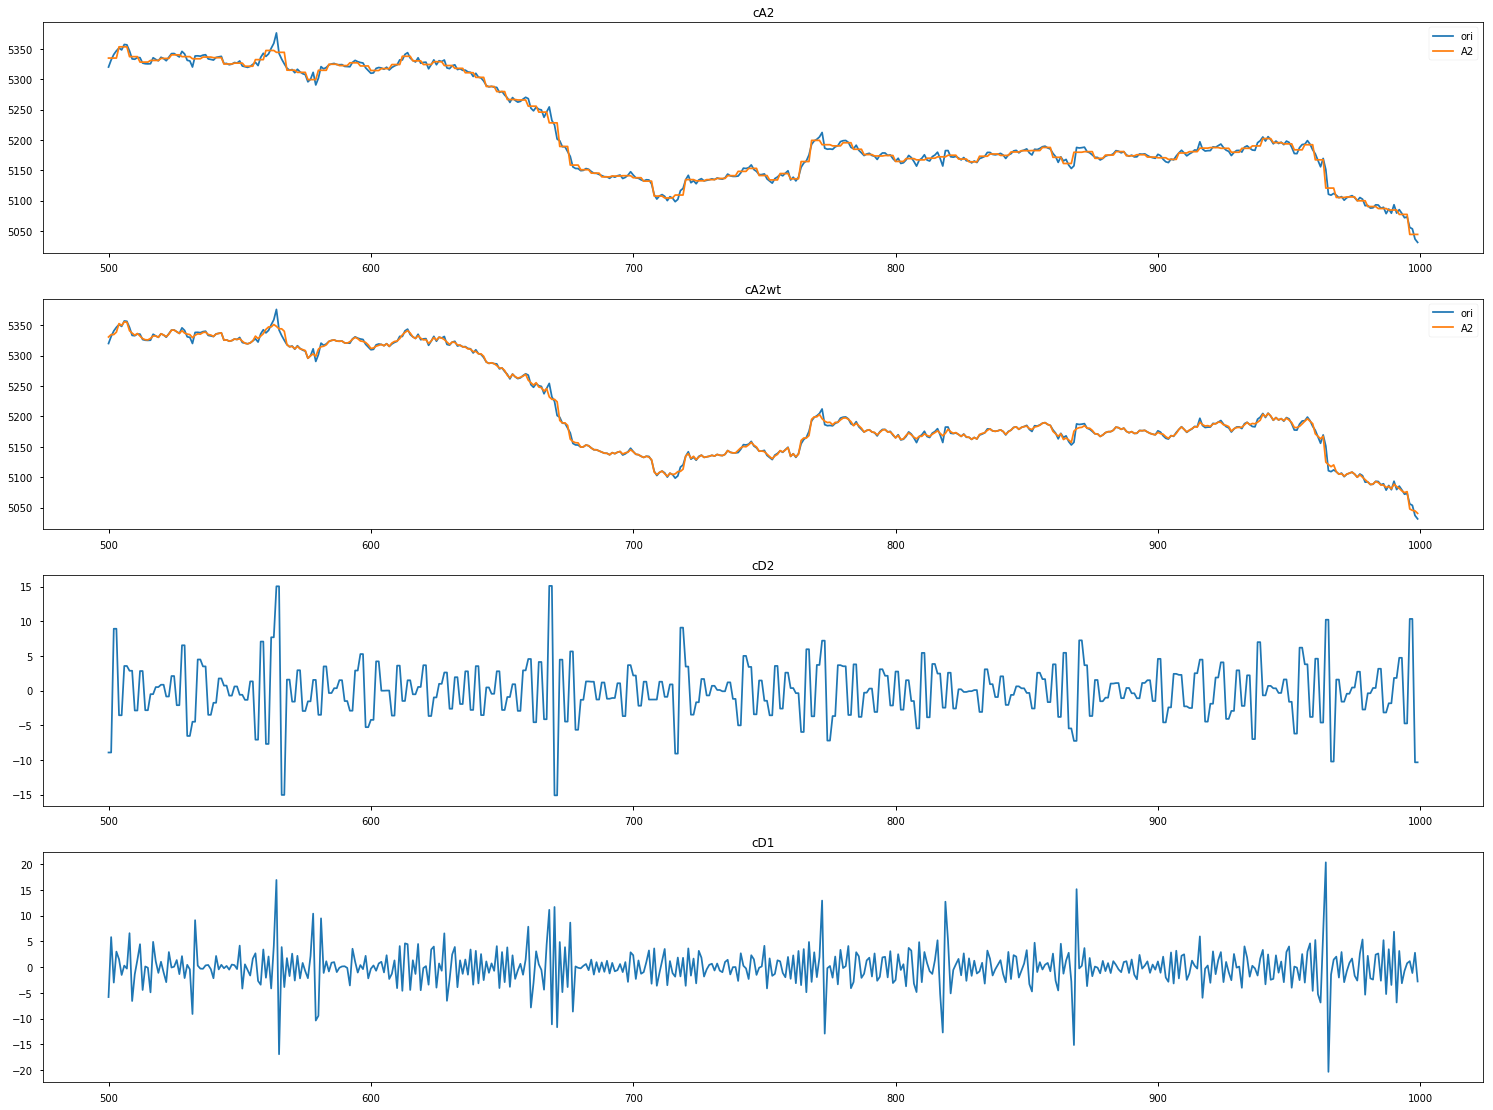

In [364]:
%%time
x = wt_denoising(X,plot=True)

API testing

In [3]:
from TechIndicator.TAIndicator import *
from TechIndicator.Denoising import *

In [1]:
import DPO

In [2]:
import pandas as pd
raw_data = pd.read_csv(".\\data\\minutedata_600519.SH.csv")
test_data = raw_data.iloc[100:400]

In [6]:
t = DPO.DPOGetTATech(test_data.OpenPx.values,test_data.HighPx.values,test_data.ClosePx.values,test_data.LowPx.values,test_data.TotalValueTrade.values,\
    techlist=['EMA','MA','MACD','ADX'])

In [10]:
t.shape

(300, 12)

In [11]:
DN = DPO.DPODenoising()

In [13]:
X = DN.denoise(t[:,0])

In [43]:
macd = TA_MACD(raw_data.ClosePx[100:400].values)

In [44]:
macd.shape[0]

300

In [45]:
index = range(macd.shape[0])

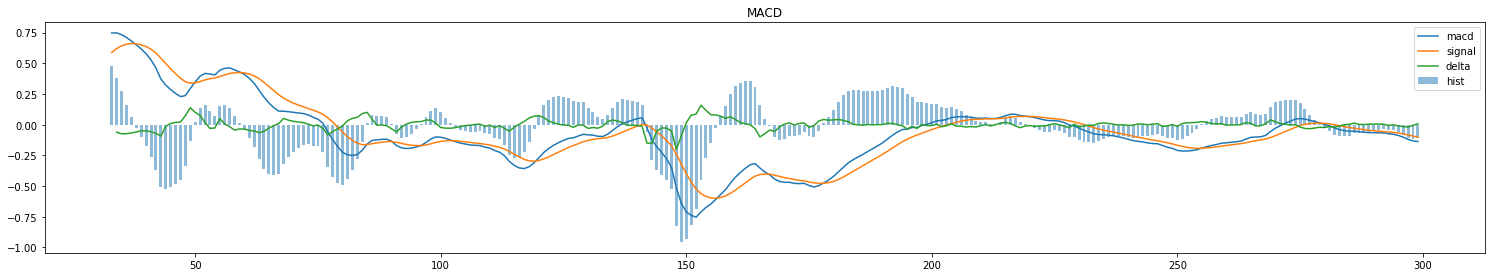

In [53]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches((20, 16))
ax_macd = fig.add_axes((0, 0.48, 1, 0.2))
    
ax_macd.plot(index, macd[:,0], label="macd")
ax_macd.bar(index, macd[:,2] * 1.5, label="hist",width=0.6,alpha=0.5)
ax_macd.plot(index, macd[:,1], label="signal")
ax_macd.plot(index, macd[:,3], label="delta")
ax_macd.set_title('MACD')
ax_macd.legend()

In [62]:
DPO_hpfilter(test_data.values)

array([205.3570116 , 205.35592693, 205.34783066, ..., 183.8826712 ,
       184.07023109, 184.29889549])

In [4]:
test_data = raw_data.fillna(method='pad').ClosePx[100:10000]

In [63]:
DPO_kalmanfilter(test_data.values)

array([205.3505278 , 205.35158341, 205.34422243, ..., 183.91192436,
       184.07276975, 184.20638487])

In [5]:
DPO_wavelet(test_data.values,plot=True)

array([205.35      , 205.36      , 205.36      , ..., 183.95545288,
       184.0340989 , 184.13499534])

In [6]:
??DPO_wavelet

Signature: DPO_wavelet(X: numpy.ndarray, threshold_ratio: float = 0.5, plot: bool = False)
Docstring: <no docstring>
Source:   
def DPO_wavelet(X: np.ndarray,
                threshold_ratio: float = 0.5,
                plot: bool = False):

    coeffs = pywt.wavedec(X, 'haar', level=2)
    A2 = wrcoef(X, 'a', coeffs, 'haar', 2)
    D2 = wrcoef(X, 'd', coeffs, 'haar', 2)
    D1 = wrcoef(X, 'd', coeffs, 'haar', 1)

    threshold_num = threshold_ratio * D2.std()

    D2_less = pywt.threshold(D2,
                             value=threshold_num,
                             mode='less',
                             substitute=threshold_num)
    D2_less = pywt.threshold(D2_less,
                             value=-threshold_num,
                             mode='greater',
                             substitute=-threshold_num)

    threshold_num = 0.5 * D1.std()
    D1_less = pywt.threshold(D1,
                             value=threshold_num,
                             mode='less',
  